# Autopilot
Based on Cyberpython (Follow the minimap) on Cyberpunk 2077 from Sentdex:
* https://www.youtube.com/watch?v=dUU6ZsJlZKQ
* https://github.com/Sentdex/cyberpython2077

In [3]:
from PIL import ImageGrab,Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

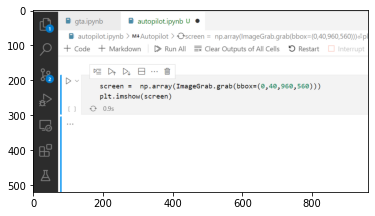

In [7]:
screen =  np.array(ImageGrab.grab(bbox=(0,40,960,560)))
plt.imshow(screen)

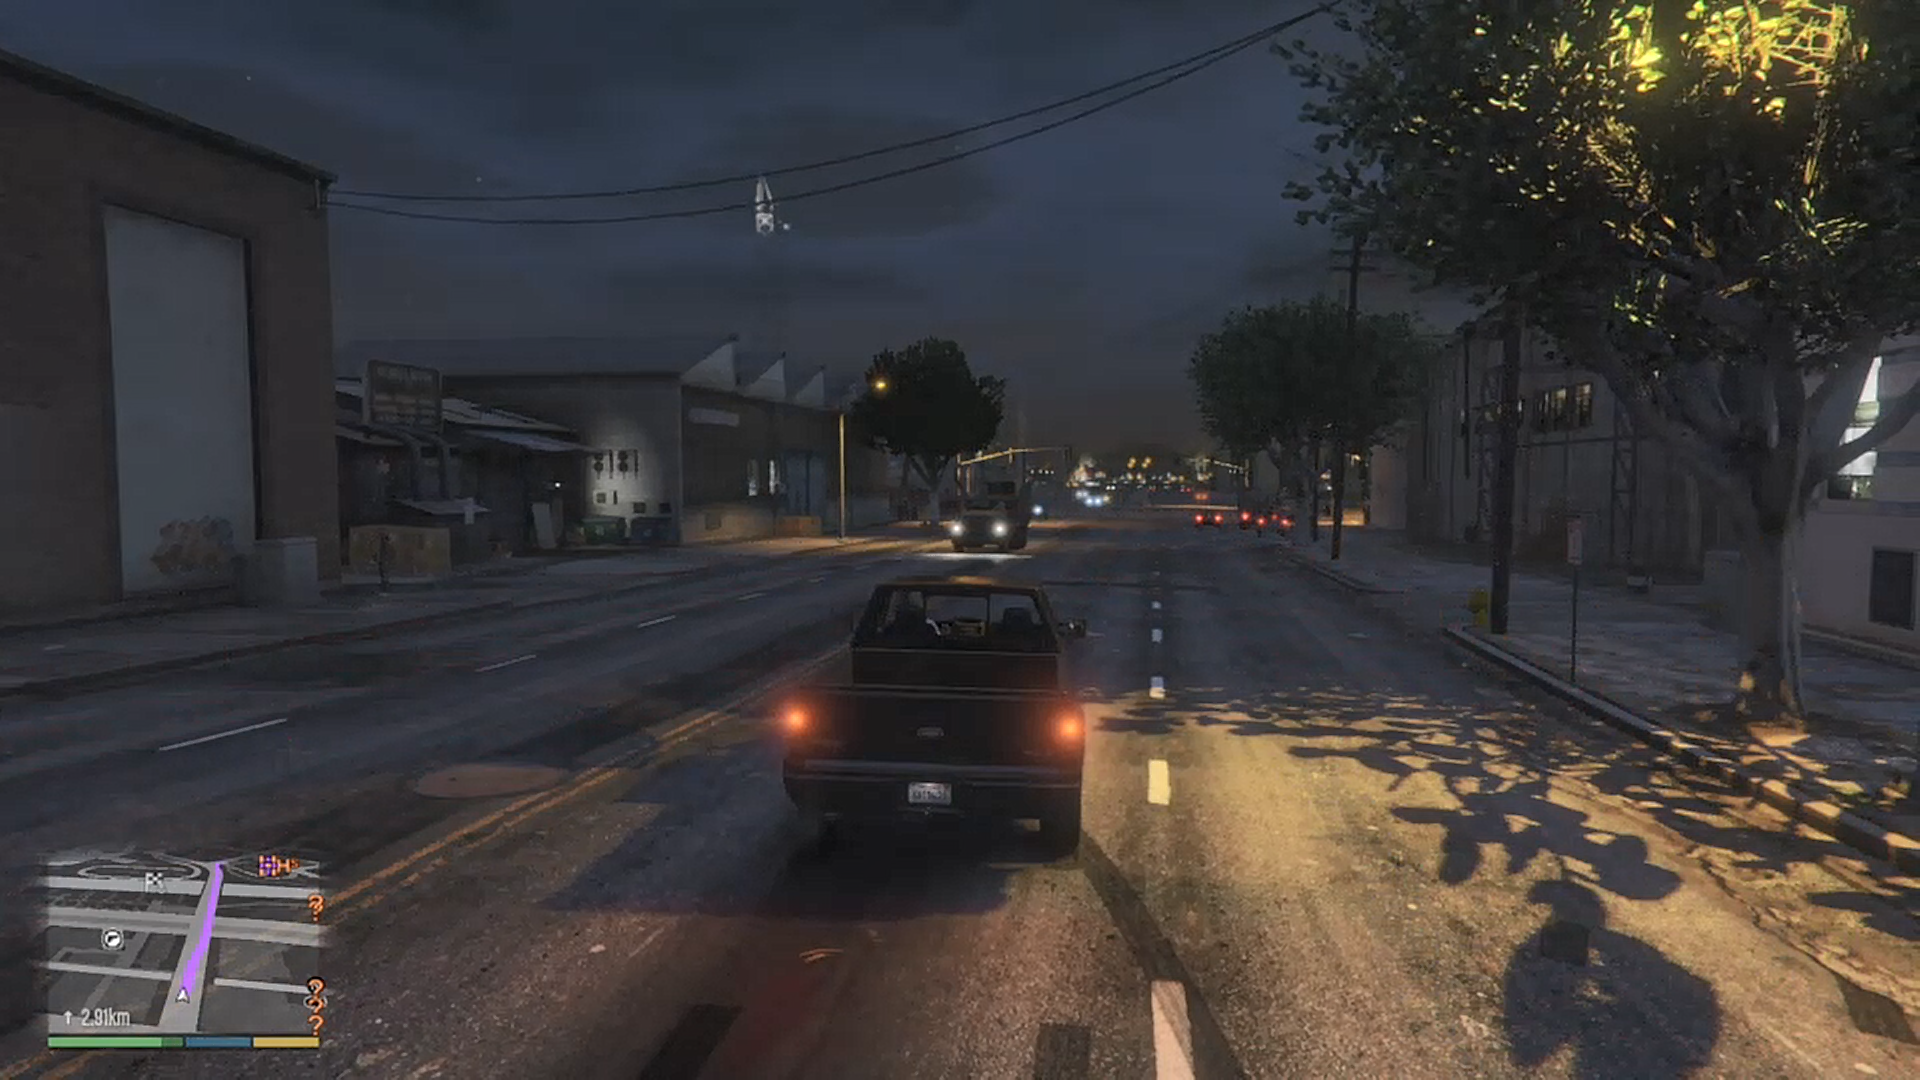

In [5]:
# img = ImageGrab.grabclipboard()
# Save the image to disk
# img.save('paste.png', 'PNG')
img = Image.open("cyberpython/gta.png")
img

Crop
* https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop
* https://www.geeksforgeeks.org/python-pil-image-crop-method/

![](cyberpython/screen2.png)

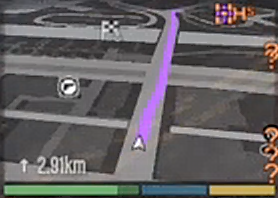

In [6]:
# Cropped image of above dimension
# (It will not change original image)
# minimap = img.crop((left, top, right, bottom))
minimap = img.crop((44, 852, 44+278, 1050))
minimap

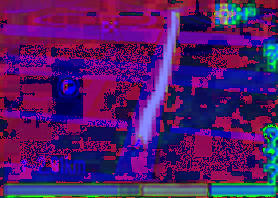

In [16]:
hsv = cv2.cvtColor(np.array(minimap), cv2.COLOR_RGB2HSV)
Image.fromarray(hsv)

### how to find the HSV values to track
https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html

![](cyberpython/color.png)
![](cyberpython/color_hsv.png)

In [19]:
purple = np.uint8([[[255, 116, 196]]]) # BGR
hsv_purple = cv2.cvtColor(purple,cv2.COLOR_BGR2HSV)
hsv_purple

array([[[137, 139, 255]]], dtype=uint8)

In [25]:
def pathing(minimap):
    # define range of purple color in HSV
    lower = np.array([137-10, 139-10, 255])
    upper = np.array([137+10, 139+10, 255])

    minimap = np.array(minimap)
    hsv = cv2.cvtColor(minimap, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv,lower,upper)
    return Image.fromarray(mask)

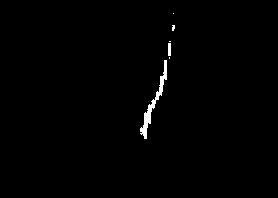

In [27]:
mask = pathing(minimap)
mask

In [40]:
np_mask = np.array(mask)
np_minimap = np.array(minimap)

In [47]:
matches = np.argwhere(np_mask==255)
# matches
mean_y = np.mean(matches[:,1])
# mean_y
target = np_minimap.shape[1]/2
error = target - mean_y
error

-16.557303370786514